In [140]:
import pandas as pd
import matplotlib.pyplot as plt

In [141]:
data=pd.read_csv('Asteroid_Data.csv').drop(['Unnamed: 0'], axis=1)

In [142]:
# del data['Unnamed']
data.columns
data.count()
# data_100=data.head(100)

Name                          19700
Is Potentially Hazardous      19700
Minimum Orbit Intersection    19699
Absolute Magnitude            19696
Close Approach Date             673
Miles per Hour                  673
Miss Distance                   673
First Observationv Date       19090
Last Observationv Date        19090
Orbit Class Type              19090
Estimated Diameter Max        19696
Estimated Diameter Min        19696
dtype: int64

In [143]:
data["First Observation Year"]=data["First Observationv Date"].str.split('-', expand=True)[0]
data["Last Observation Year"]=data["Last Observationv Date"].str.split('-', expand=True)[0]
data["Close Approach Year"]=data["Close Approach Date"].str.split('-', expand=True)[0]
data['Estimated Diameter Avg']=(data['Estimated Diameter Max']+data['Estimated Diameter Min'])/2
data_sort = data[data['Is Potentially Hazardous']==True].sort_values(by='Close Approach Date', ascending=False)
data_sort.head()

,Name,Is Potentially Hazardous,Minimum Orbit Intersection,Absolute Magnitude,Close Approach Date,Miles per Hour,Miss Distance,First Observationv Date,Last Observationv Date,Orbit Class Type,Estimated Diameter Max,Estimated Diameter Min,First Observation Year,Last Observation Year,Close Approach Year,Estimated Diameter Avg
3709,(2016 VZ18),True,0.019887,18.700,2019-08-23,34397.619756,1.540439e+08,NaN,NaN,NaN,0.672034,0.300543,NaN,NaN,2019,0.486288
4071,(2017 OD69),True,0.028347,21.112,2017-10-01,16969.299204,3.143321e+06,NaN,NaN,NaN,0.221305,0.098971,NaN,NaN,2017,0.160138
3686,(2002 MU7),True,0.003751,20.986,2002-08-03,35942.817109,9.827378e+05,NaN,NaN,NaN,0.234526,0.104883,NaN,NaN,2002,0.169705
11559,(2015 DE198),True,0.042957,18.700,1944-08-28,59867.960377,4.607578e+07,NaN,NaN,NaN,0.672034,0.300543,NaN,NaN,1944,0.486288
10936,(2014 DN112),True,0.002085,20.100,1936-01-12,47855.881693,3.760815e+07,2014-02-28,2018-09-18,APO,0.352688,0.157727,2014,2018,1936,0.255208
8674,(2012 TS78),True,0.007076,18.600,1928-03-12,50645.554210,2.998771e+07,NaN,NaN,NaN,0.703706,0.314707,NaN,NaN,1928,0.509206
5300,(2001 FE90),True,0.014811,20.600,1926-03-27,40323.025499,3.276398e+07,NaN,NaN,NaN,0.280150,0.125287,NaN,NaN,1926,0.202719
6490,(2005 UJ159),True,0.037363,17.600,1925-12-26,57807.450810,1.820073e+07,NaN,NaN,NaN,1.115298,0.498776,NaN,NaN,1925,0.807037
8544,(2012 LK9),True,0.045544,17.800,1925-12-12,52133.345570,3.410936e+07,NaN,NaN,NaN,1.017164,0.454890,NaN,NaN,1925,0.736027
8910,(2014 KQ76),True,0.040918,21.600,1922-08-27,32951.390836,7.790702e+06,NaN,NaN,NaN,0.176763,0.079051,NaN,NaN,1922,0.127907


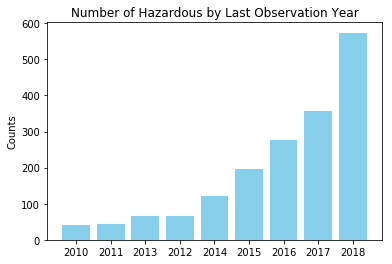

In [176]:
data_sort_count=pd.DataFrame(data_sort[data_sort['Last Observation Year']>='2010']['Last Observation Year'].value_counts()).reset_index()
data_sort_count=data_sort_count.sort_values(by='Last Observation Year', ascending=True)
fig,ax = plt.subplots()
ax.bar(data_sort_count['index'], data_sort_count['Last Observation Year'], width=0.8, color='skyblue')
plt.ylabel('Counts')
plt.title('Number of Hazardous by Last Observation Year')
plt.show()

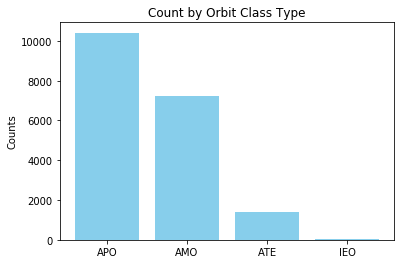

In [149]:
# data_orbit_class=pd.DataFrame(data[data['Orbit Class Type']!='NaN']['Orbit Class Type'].value_counts()).reset_index()
data_orbit_class=pd.DataFrame(data['Orbit Class Type'].value_counts()).reset_index()
fig,ax = plt.subplots()
ax.bar(data_orbit_class['index'], data_orbit_class['Orbit Class Type'], width=0.8, color='skyblue')
plt.ylabel('Counts')
plt.title('Count by Orbit Class Type')
plt.show()
# APO and AMO are top two classes

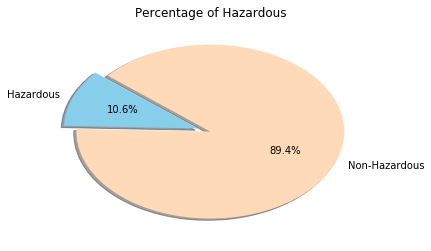

In [133]:
# percentage of getting ateriod hazardous
explode = (0.1, 0)  # explode 1st slice
labels= 'Hazardous', 'Non-Hazardous'
colors = ('skyblue', 'peachpuff')
Non_Hazardous = data[data['Is Potentially Hazardous']==False]['Is Potentially Hazardous'].count()
Hazardous = data[data['Is Potentially Hazardous']==True]['Is Potentially Hazardous'].count()
data_pie=[Hazardous,Non_Hazardous]
# Plot
plt.pie(data_pie, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Hazardous')
plt.show()
# There is 10 percent of chance for orbit to become hazardous

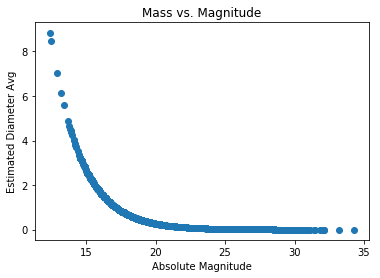

In [134]:
# remove outliers
data_mag_dia=data[data['Estimated Diameter Avg']<=10]
plt.scatter(x=data_mag_dia['Absolute Magnitude'],y=data_mag_dia['Estimated Diameter Avg'])
plt.ylabel('Estimated Diameter Avg')
plt.xlabel('Absolute Magnitude')
plt.title('Mass vs. Magnitude')
plt.show()
# The smaller the orbit, the brighter it is

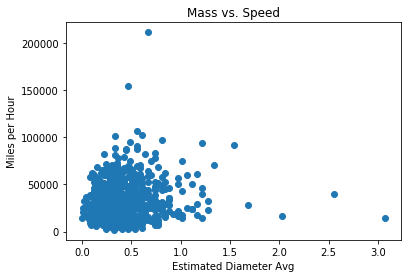

In [137]:
# data_mag_dia=data[data['Estimated Diameter Avg']<=10]
plt.scatter(x=data_mag_dia['Estimated Diameter Avg'],y=data_mag_dia['Miles per Hour'])
plt.ylabel('Miles per Hour')
plt.xlabel('Estimated Diameter Avg')
plt.title('Mass vs. Speed')
plt.show()
# The smaller the orbit, the brighter it is

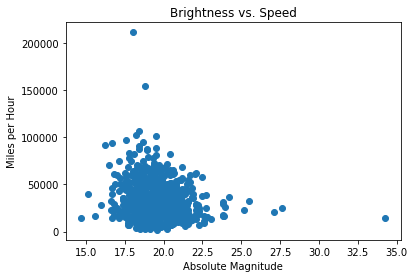

In [138]:
# data_mag_dia=data[data['Estimated Diameter Avg']<=10]
plt.scatter(x=data_mag_dia['Absolute Magnitude'],y=data_mag_dia['Miles per Hour'])
plt.ylabel('Miles per Hour')
plt.xlabel('Absolute Magnitude')
plt.title('Brightness vs. Speed')
plt.show()
# The smaller the orbit, the brighter it is

In [52]:
# data.head()

,Name,Is Potentially Hazardous,Minimum Orbit Intersection,Absolute Magnitude,Close Approach Date,Miles per Hour,Miss Distance,First Observationv Date,Last Observationv Date
0,21277 (1996 TO5),False,0.312604,16.1,1945-06-07,34693.20919,3107066.5,1990-02-04,2018-11-03
1,162038 (1996 DH),False,0.134480,16.6,NaN,NaN,NaN,1996-02-18,2018-05-05
2,189058 (2000 UT16),False,0.537905,16.5,NaN,NaN,NaN,1996-11-19,2017-11-25
3,276274 (2002 SS41),False,0.601327,17.2,NaN,NaN,NaN,2002-09-11,2017-09-27
4,322913 (2002 CM1),False,0.578061,16.7,NaN,NaN,NaN,2002-02-03,2018-09-28


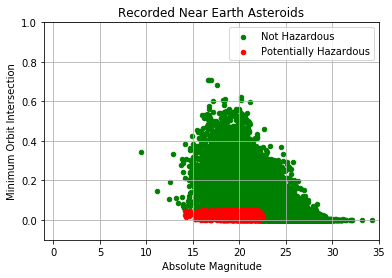

In [61]:
#Creates a scatter plot that shows all of the asteroids sorted by whether it is potentially hazardous or not.
hazard_data = data.loc[data["Is Potentially Hazardous"] == True , :]
not_hazard = data.loc[data["Is Potentially Hazardous"] == False , :]
ax = not_hazard.plot(kind='scatter', x='Absolute Magnitude', y='Minimum Orbit Intersection', c="green", label="Not Hazardous")
hazard_data.plot(kind="scatter", y='Minimum Orbit Intersection', x='Absolute Magnitude', grid=True, c='red', label = "Potentially Hazardous",title="Recorded Near Earth Asteroids", ax=ax)
plt.ylim(-.1,1,.25)
plt.xlim(-1,35,3)
plt.show()

In [59]:
#closest_data = data.sort_values('Minimum Orbit Intersection')
#closest_data.head()

#brightest_data = data.sort_values('Absolute Magnitude')
#brightest_data.head(20)

,Name,Is Potentially Hazardous,Minimum Orbit Intersection,Absolute Magnitude,Close Approach Date,Miles per Hour,Miss Distance,First Observationv Date,Last Observationv Date
3449,1036 Ganymed (A924 UB),False,0.343497,9.45,1910-02-25,14101.121747,181845424.0,1924-10-23,2018-07-03
5541,433 Eros (A898 PA),False,0.149341,11.16,1900-12-27,12478.805089,29274524.0,1963-07-15,2018-10-27
5554,1866 Sisyphus (1972 XA),False,0.104496,12.40,1912-12-09,75639.848103,41935692.0,1955-01-26,2018-07-16
4316,4954 Eric (1990 SQ),False,0.194159,12.50,1908-10-02,34269.286978,30780730.0,1975-06-07,2018-10-22
5577,3552 Don Quixote (1983 SA),False,0.333524,12.90,1904-09-07,47472.349626,39496940.0,1983-09-10,2018-11-02
3443,1627 Ivar (1929 SH),False,0.111610,13.20,1901-07-11,18753.134051,22917838.0,1929-09-25,2018-11-02
5548,887 Alinda (A918 AA),False,0.086571,13.40,1910-01-04,15221.640701,29796306.0,1918-02-03,2018-07-12
4217,25916 (2001 CP44),False,0.280226,13.70,1904-07-07,23111.901505,35976724.0,1973-04-10,2018-10-26
4182,5587 (1990 SB),False,0.306512,13.80,1901-05-02,45533.917102,45623548.0,1953-12-07,2018-01-20
17139,2212 Hephaistos (1978 SB),False,0.115947,13.87,1905-03-14,65812.033265,10959392.0,1978-09-27,2018-10-31


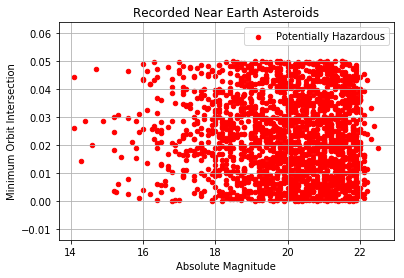

In [62]:
hazard_data.plot(kind="scatter", y='Minimum Orbit Intersection', x='Absolute Magnitude', grid=True, c='red', label = "Potentially Hazardous",title="Recorded Near Earth Asteroids")

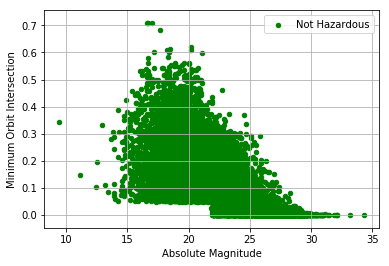

In [63]:
not_hazard.plot(kind='scatter', x='Absolute Magnitude', y='Minimum Orbit Intersection', c="green", label="Not Hazardous", grid=True)